In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
df=pd.read_csv('songs.csv')

In [25]:
df.head()

,Name,Artist,Album,Popularity,Lyrics
0,Imagine - Remastered 2010,John Lennon,Imagine,79,8 ContributorsDiscographie 2021 — Pop & Rock L...
1,A Whiter Shade Of Pale,Procol Harum,A Whiter Shade Of Pale,0,38 ContributorsA Whiter Shade of Pale Lyrics[I...
2,My Sweet Lord,George Harrison,All Things Must Pass (Remastered),0,58 ContributorsMy Sweet Lord Lyrics[Chorus]\nM...
3,God Only Knows - Mono,The Beach Boys,Pet Sounds (Original Mono & Stereo Mix),67,1 ContributorGod Only Knows (mono mix) LyricsI...
4,Bridge Over Troubled Water,Simon & Garfunkel,Bridge Over Troubled Water,72,57 ContributorsBridge Over Troubled Water Lyri...


In [26]:
df.tail()

,Name,Artist,Album,Popularity,Lyrics
794,Thinking out Loud,Ed Sheeran,x (Deluxe Edition),85,192 ContributorsTranslationsTürkçeEspañolPortu...
795,Sorry,Justin Bieber,Purpose (Deluxe),83,194 ContributorsTranslationsEspañolPortuguêsFr...
796,Lean On (feat. MØ & DJ Snake),Major Lazer,Major Lazer Essentials,30,3 ContributorsTop Tracks of 2016 - Global Lyri...
797,Take Me To Church,Hozier,The Singer Songwriter,25,339 ContributorsTranslationsفارسیEspañolFrança...
798,King,Years & Years,Communion (Deluxe),63,37 ContributorsKing Lyrics[Verse 1]\nI caught ...


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        799 non-null    object
 1   Artist      799 non-null    object
 2   Album       799 non-null    object
 3   Popularity  799 non-null    int64 
 4   Lyrics      799 non-null    object
dtypes: int64(1), object(4)
memory usage: 31.3+ KB


In [28]:
df.columns

Index(['Name', 'Artist', 'Album', 'Popularity', 'Lyrics'], dtype='object')

In [29]:
import re
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df['Clean_Lyrics'] = df['Lyrics'].astype(str).apply(clean_text)


In [31]:
anti_valentine_words = [
    "breakup", "broken", "heartbreak", "alone", "lonely",
    "cry", "tears", "hate", "toxic", "cheat",
    "goodbye", "regret", "pain", "sad", "hurt",
    "lost", "leave", "left", "lie", "betray"
]

In [32]:
def anti_valentine_score(text):
    return sum(word in text for word in anti_valentine_words)

df['Keyword_Score'] = df['Clean_Lyrics'].apply(anti_valentine_score)


In [33]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['Sentiment'] = df['Clean_Lyrics'].apply(get_sentiment)

In [34]:
df['Anti_Valentine_Index'] = (
    df['Keyword_Score'] * 2 +
    (-df['Sentiment'] * 5) +
    (df['Popularity'] / 20)
)


In [35]:
top_anti_valentine = df.sort_values(
    by='Anti_Valentine_Index', ascending=False
).head(10)

print(top_anti_valentine[['Name','Artist','Popularity','Anti_Valentine_Index']])


                                                  Name  \
605  Too Many Nights (feat. Don Toliver & with Future)   
28                      Waterloo Sunset - Mono Version   
145                     A Design for Life - Remastered   
42                                Jump - 2015 Remaster   
433                              Queen of Belle la Vie   
157                      Don't Stop Movin' - Radio Mix   
458                                          Gold Leaf   
54                 Baby Love - Juke Box Single Version   
87   Because You Loved Me (Theme from "Up Close and...   
737                  I'm Not The Only One - Radio Edit   

                            Artist  Popularity  Anti_Valentine_Index  
605                   Metro Boomin          88             38.133409  
28                       The Kinks          40             37.434999  
145         Manic Street Preachers          55             36.154717  
42                       Van Halen          80             35.533244  
433  T

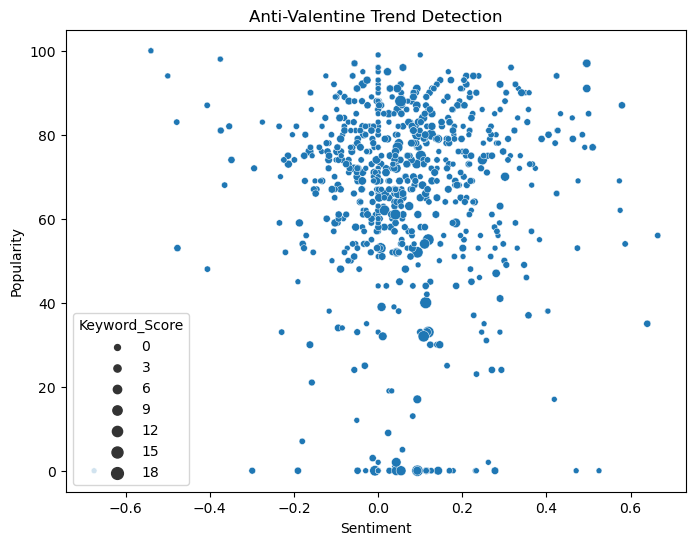

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Sentiment',
    y='Popularity',
    size='Keyword_Score',
    data=df
)
plt.title("Anti-Valentine Trend Detection")
plt.show()


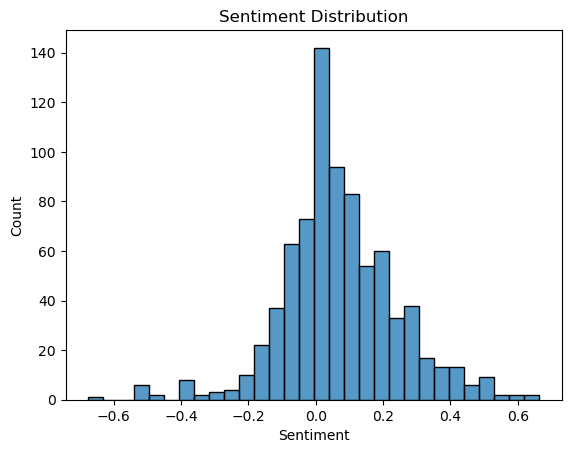

In [37]:
sns.histplot(df['Sentiment'], bins=30)
plt.title("Sentiment Distribution")
plt.show()

In [38]:
marriage_terms = [
    "marriage", "marry", "wedding", "bride", "groom",
    "husband", "wife", "ring", "engagement",
    "vows", "forever", "commitment"
]

negative_terms = [
    "hate", "regret", "trap", "prison",
    "cheat", "lie", "leave", "divorce",
    "broken", "cry", "toxic", "pain"
]


In [39]:
def anti_marriage_score(text):
    text = text.lower()
    
    marriage_count = sum(word in text for word in marriage_terms)
    negative_count = sum(word in text for word in negative_terms)
    
    sentiment = TextBlob(text).sentiment.polarity
    
    score = marriage_count * 2 + negative_count * 1.5 + (-sentiment * 3)
    
    return score


In [40]:
df['Anti_Marriage_Score'] = df['Lyrics'].astype(str).apply(anti_marriage_score)

In [41]:
anti_marriage_songs = df[
    (df['Anti_Marriage_Score'] > df['Anti_Marriage_Score'].quantile(0.90))
]

anti_marriage_songs = anti_marriage_songs.sort_values(
    by='Anti_Marriage_Score',
    ascending=False
)

print(anti_marriage_songs[['Name','Artist','Popularity','Anti_Marriage_Score']].head(15))


                                                  Name  \
28                      Waterloo Sunset - Mono Version   
433                              Queen of Belle la Vie   
145                     A Design for Life - Remastered   
228                                    Sea Of Problems   
253                                         Past Lives   
50                   All You Need Is Love - Remastered   
152  Sittin' Up In My Room - from Waiting to Exhale...   
410                                      Disco Voyager   
458                                          Gold Leaf   
737                  I'm Not The Only One - Radio Edit   
605  Too Many Nights (feat. Don Toliver & with Future)   
463                                      Mr. Invisible   
277  The Adventures of Moon Man & Slim Shady (with ...   
119                          One Of Us - Short Version   
157                      Don't Stop Movin' - Radio Mix   

                            Artist  Popularity  Anti_Marriage_Score  
2

In [42]:
import pandas as pd
import plotly.express as px

# Assuming Anti_Valentine_Index already exists
# Filter strong Anti-Valentine songs (adjust threshold if needed)

anti_df = df[df['Anti_Valentine_Index'] > df['Anti_Valentine_Index'].quantile(0.75)]

# Create Sunburst Chart
fig = px.sunburst(
    anti_df,
    path=['Artist', 'Album', 'Name'],   # Hierarchy
    values='Anti_Valentine_Index',      # Size of segment
    color='Sentiment',                  # Color based on negativity
    color_continuous_scale='RdBu',
    title="🔥 Anti-Valentine Songs Sunburst Analysis"
)

fig.update_layout(
    margin=dict(t=50, l=0, r=0, b=0)
)

fig.show()
